# **IMPORT LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# **IMPORT DATASET**

In [5]:
df = pd.read_excel("https://docs.google.com/uc?export=download&id=1UJx7LKpI8LEDTUhNFWlxLP1doXWtVLxb")
df.head()

,Nim,Hasil _Sebenarnya,Hasil_Prediksi
0,TI001,Lulus,Lulus
1,TI002,Lulus,Lulus
2,TI003,Lulus,Lulus
3,TI004,Lulus,Tidak Lulus
4,TI005,Lulus,Tidak Lulus


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Nim                10 non-null     object
 1   Hasil _Sebenarnya  10 non-null     object
 2   Hasil_Prediksi     10 non-null     object
dtypes: object(3)
memory usage: 372.0+ bytes


In [7]:
#Kolom yang digunakan untuk korelasi
df = df.drop(columns=['Nim'])
df.head()

,Hasil _Sebenarnya,Hasil_Prediksi
0,Lulus,Lulus
1,Lulus,Lulus
2,Lulus,Lulus
3,Lulus,Tidak Lulus
4,Lulus,Tidak Lulus


In [20]:
replacements = {
    'Hasil _Sebenarnya' : {'Lulus' : 1, 'Tidak Lulus' : 0},
    'Hasil_Prediksi' : {'Lulus' : 1, 'Tidak Lulus' : 0}
}

df = df.replace(replacements, inplace=False)
display(df.head())
display(df.info())

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,0
4,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Actual     10 non-null     int64
 1   Predicted  10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


None

In [21]:
actual_col = "Actual"
predicted_col = "Predicted"

df.head()

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,0
4,1,0


In [22]:
df = df.rename(columns={'Hasil _Sebenarnya': actual_col, 'Hasil_Prediksi': predicted_col})
display(df.head())

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,0
4,1,0


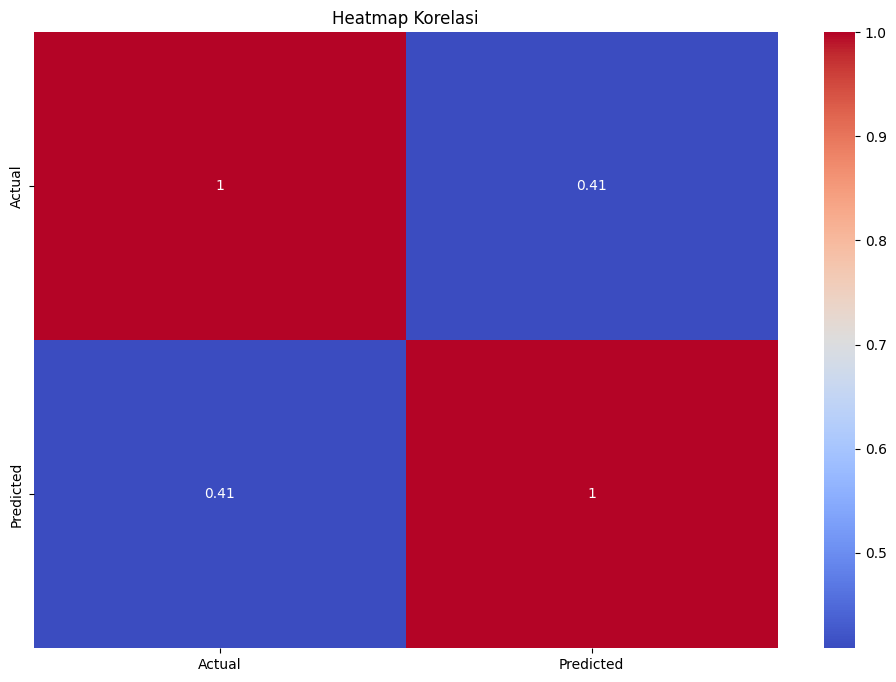

In [23]:
#Menghitung matriks korelasi menggunakan spearman
correlation_matrix = df.corr(method='spearman')

#Membuat Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Heatmap Korelasi')
plt.show()

In [24]:
y_true = df[actual_col]
y_pred = df[predicted_col]

In [25]:
cm = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[4 1]
 [2 3]]


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

pos_label_value = y_true.unique()[0]

accuracy  = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, pos_label=pos_label_value)
recall    = recall_score(y_true, y_pred, pos_label=pos_label_value)

print("\nAccuracy : {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall   : {:.2f}%".format(recall * 100))


Accuracy : 70.00%
Precision: 75.00%
Recall   : 60.00%
